<a href="https://colab.research.google.com/github/Jyoti-S-Shukla/Machine-learning-models/blob/main/Clustering_Part_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**CLUSTERING Part 1**

In this Lab you will have to write code for 2 clustering algorithms based on the mathematical theory :

1. K-means Clustering
2. Gaussian Mixture Model

You will then have to use these algorithms on a pratical dataset and compare the results with the inbuilt algorithms present in scikit learn toolkit

**Please use plots wherever possible to demonstrate the results**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# K-means Clustering

K-means clustering is a type of unsupervised learning, which is used when you have unlabeled data (i.e., data without defined categories or groups). The goal of this algorithm is to find groups in the data, with the number of groups represented by the variable K. The algorithm works iteratively to assign each data point to one of K groups based on the features that are provided. 



**Step 1 : Data Generation** 

Generate 2D gaussian data of 4 types each having 100 points, by taking appropriate mean and varince (example: mean :(0.5 0) (5 5) (5 1) (10 1.5), variance : Identity matrix)

(400, 2)


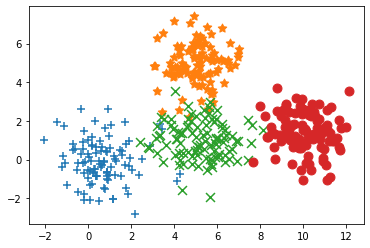

In [ ]:
# write your code here
mean_1 =[0.5,0]
mean_2 = [5,5]
mean_3 =[5,1]
mean_4 = [10,1.5]
variance =[[1,0],[0,1]]

dist_1 = np.random.multivariate_normal(mean_1, variance,(100))
#print(dist_1)
dist_2 = np.random.multivariate_normal(mean_2,variance,100)
dist_3 = np.random.multivariate_normal(mean_3, variance,100)
dist_4 = np.random.multivariate_normal(mean_4,variance,100)
plt.scatter(dist_1[:,0],dist_1[:,1],s=80,marker='+')
plt.scatter(dist_2[:,0],dist_2[:,1],s=80,marker =(5, 1))
plt.scatter(dist_3[:,0],dist_3[:,1],s=80,marker ='x')
plt.scatter(dist_4[:,0],dist_4[:,1],s=80,marker ='o')

#sample = np.empty((400,4))
sample = np.vstack((dist_1,dist_2,dist_3,dist_4))
print(sample.shape)

**Step 2 : Cluster Initialisation**

Initialse K number of Clusters (Here, K=4)

[[3.07178967 4.82726665]
 [8.75684292 3.70699882]
 [5.85136609 0.42630744]
 [5.63450428 4.0169709 ]]


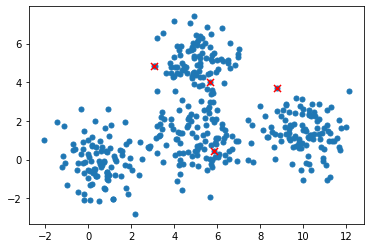

In [ ]:
# write your code here
from math import sqrt, floor
import numpy as np


def random(ds, k, random_state=42):
    np.random.seed(random_state)
    centroids = []
    m = np.shape(ds)[0]

    for _ in range(k):
        r = np.random.randint(0, m-1)
        centroids.append(ds[r])

    return np.array(centroids)

random_centroids = random(sample, 4)
print(random_centroids)
plt.scatter(sample[:,0],sample[:,1],s=25)
plt.scatter(random_centroids[:,0],random_centroids[:,1],s=50, c= 'red',marker ='x',alpha =1,linewidths=10)

**Step 3 : Cluster assignment and re-estimation Stage**

a) Using initial/estimated cluster centers (mean $\mu_{i}$) perform cluster assignment.

b) Assigned cluster for each feature vector ($X_{j}$) can be written as:
$$arg \min_{i} ||C_{i}-X_{j}||_{2},~1 \leq i \leq K,~1\leq j \leq N$$ 
c) Re-estimation: After cluster assignment, the mean vector is recomputed as,
$$\mu_{i}=\frac{1}{N_{i}}\sum_{j \in i^{th} cluster}X_{j}$$
where $N_{i}$ represents the number of datapoints in the $i^{th}$ cluster.

d) Objective function (to be minimized):
$$Error(\mu)=\frac{1}{N}\sum_{i=1}^{K}\sum_{j \in i^{th} cluster}||C_{i}-X_{j}||_{2}$$

Number of Iteration : 0


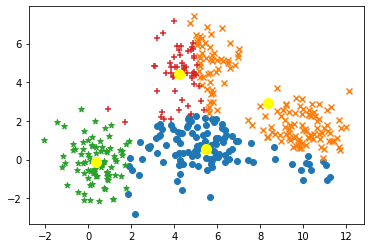

Number of Iteration : 1


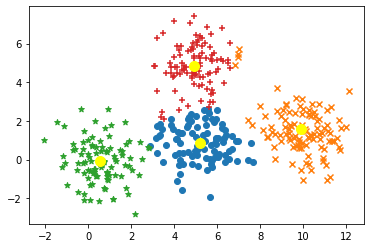

Number of Iteration : 2


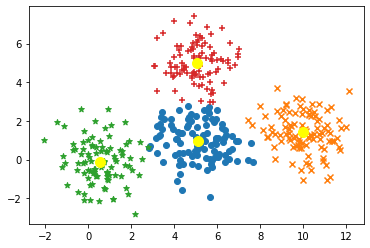

Number of Iteration : 3


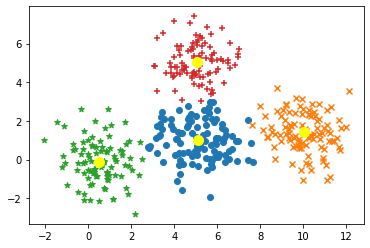

Number of Iteration : 4


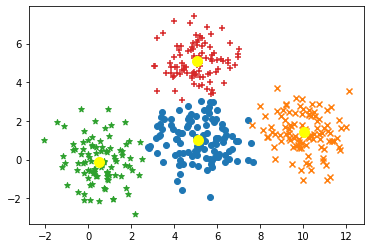

Number of Iteration : 5


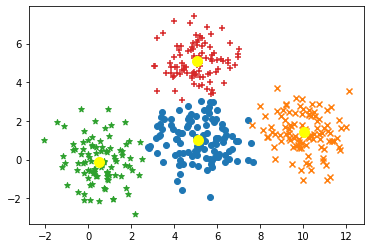

Number of Iteration : 6


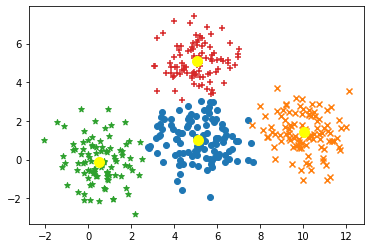

Number of Iteration : 7


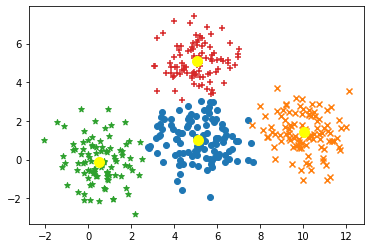

Number of Iteration : 8


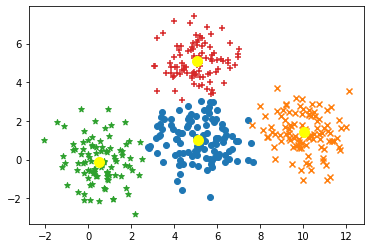

Number of Iteration : 9


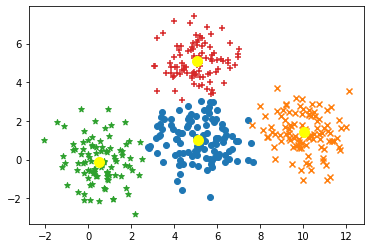

In [ ]:
K=4 # number of clusters
n_iter = 10
m = sample.shape[0] 
n= sample.shape[1]# no. of feature ,here 2
Centroids=np.array([]).reshape(n,0) 
Output={}
for i in range(K):
    rand=np.random.randint(0,m-1)
    Centroids=np.c_[Centroids,sample[rand]]
for i in range(n_iter):
      print("Number of Iteration :",i)
     #step 2.a
      EuclidianDistance=np.array([]).reshape(m,0)
      for k in range(K):
          tempDist=np.sum((sample-Centroids[:,k])**2,axis=1)
          EuclidianDistance=np.c_[EuclidianDistance,tempDist]
      C=np.argmin(EuclidianDistance,axis=1)+1
     #step 2.b
      Y={}
      for k in range(K):
          Y[k+1]=np.array([]).reshape(2,0)
      for i in range(m):
          Y[C[i]]=np.c_[Y[C[i]],sample[i]]
     
      for k in range(K):
          Y[k+1]=Y[k+1].T
    
      for k in range(K):
          Centroids[:,k]=np.mean(Y[k+1],axis=0)
      Output=Y
      markers =['o','x','*','+']
      #WCSS_array=np.array([])
      #wcss =0
      for k in range(K):
        plt.scatter(Output[k+1][:,0],Output[k+1][:,1],marker=markers[k])
        #wcss+=np.sum((Output[k+1]-Centroids[:,k])**2)
        #WCSS_array=np.append(WCSS_array,wcss)
      #WCSS_array=np.append(WCSS_array,wcss)
      plt.scatter(Centroids[0,:],Centroids[1,:],s=100, c ='yellow')
      plt.show()
#K_array=np.arange(1,6,1)
#plt.plot(K_array,WCSS_array)
#plt.ylabel('within-cluster sums of squares (WCSS)')
#plt.title('Elbow method to determine optimum number of clusters')
#plt.show()
        

Text(0, 0.5, 'Dispersion')

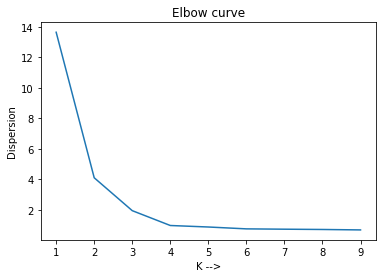

In [ ]:
import scipy.spatial.distance as metric
def euclidean_dist(A, B):
    return metric.euclidean(A, B)
class K_Means:
    def __init__(self,k,data,centeriod_init=None):
        self.k = k
        self.data = data  
        self.centeriod_init = centeriod_init
        
    def initialise_centroids(self,centeriod_init,k,data):
        ## 3 ways to initialize centroides
        if(self.centeriod_init == 'random'): 
            initial_centroids = np.random.permutation(data.shape[0])[:self.k]
            self.centroids = data[initial_centroids]
        elif(self.centeriod_init == 'firstk'):
            self.centroids = data[:k]
        else:
            for i in range(self.k):
                self.centroids.append(i%self.k)
        return self.centroids    
 
    def fit(self,data):
        m = np.shape(data)[0]
        cluster_assignments = np.mat(np.zeros((m,2)))
        
        cents = self.initialise_centroids(self.centeriod_init,self.k,data)
        
        # Preserve original centroids
        cents_orig = cents.copy()
        changed = True
        num_iter = 0
        
        while changed and num_iter<100:
            changed = False 
            # for each row in the dataset
            for i in range(m):
                # Track minimum distance and vector index of associated cluster
                min_dist = np.inf
                min_index = -1 
                #calculate distance 
                for j in range(self.k):
                    dist_ji = euclidean_dist(cents[j,:],data[i,:])
                    if(dist_ji < min_dist):
                        min_dist = dist_ji
                        min_index = j 
                    # Check if cluster assignment of instance has changed
                    if cluster_assignments[i, 0] != min_index: 
                        changed = True

                # Assign instance to appropriate cluster
                cluster_assignments[i, :] = min_index, min_dist**2

            # Update centroid location
            for cent in range(self.k):
                points = data[np.nonzero(cluster_assignments[:,0].A==cent)[0]]
                cents[cent,:] = np.mean(points, axis=0)
    
            # Count iterations
            num_iter += 1
            #print(num_iter)

         # Return important stuff when done
        return cents, cluster_assignments, num_iter, cents_orig

costs = []
for i in range(10):
    kmeans = K_Means(k=i,data = sample,centeriod_init='firstk')
    centroids, cluster_assignments, iters, orig_centroids = kmeans.fit(sample)
    distance = cluster_assignments[:,1]  ## This has the distance from their respective centroides for evaluation purposes 
    cost = sum(distance)/(2*len(sample))
    cost = np.array(cost)
    cost =  cost.item()
    costs.append(cost)
    
x = np.arange(10)
plt.plot(x,costs)
plt.title("Elbow curve")
plt.xlabel("K -->")
plt.ylabel("Dispersion")

**Step 4 : Performance metric**

Compute Homogeneity score and Silhouette coefficient using the information given below 

Homogeneity score : A clustering result satisfies homogeneity if all of its clusters contain only data points which are members of a single class.
This metric is independent of the absolute values of the labels: a permutation of the class or cluster label values won’t change the score value in any way.

Silhouette coeeficient : 

$a(x)$ : Average distance of x to all other vectors in same cluster

$b(x)$ : Average distance of x to the vectors in other clusters. Find minimum among the clusters

$s(x)$ = $\frac{b(x) - a(x)}{max(a(x),b(x))}$

Silhouette coefficient (SC) : 

$$ SC =  \frac{1}{N}\sum_{i=1}^{N}s(x) $$

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in true_divide
  app.launch_new_instance()


The silhoute coeffecient for cluster number 0 is [nan]
The silhoute coeffecient for cluster number 1 is [nan, 0.9849995546791946]
The silhoute coeffecient for cluster number 2 is [nan, 0.9849995546791946, 0.9977094250735322]
The silhoute coeffecient for cluster number 3 is [nan, 0.9849995546791946, 0.9977094250735322, 0.9993701874951324]
The silhoute coeffecient for cluster number 4 is [nan, 0.9849995546791946, 0.9977094250735322, 0.9993701874951324, 0.9997666065124576]
The silhoute coeffecient for cluster number 5 is [nan, 0.9849995546791946, 0.9977094250735322, 0.9993701874951324, 0.9997666065124576, 0.9998392609979101]
The silhoute coeffecient for cluster number 6 is [nan, 0.9849995546791946, 0.9977094250735322, 0.9993701874951324, 0.9997666065124576, 0.9998392609979101, 0.9998754624517161]
The silhoute coeffecient for cluster number 7 is [nan, 0.9849995546791946, 0.9977094250735322, 0.9993701874951324, 0.9997666065124576, 0.9998392609979101, 0.9998754624517161, 0.9999047078277146]


Text(0, 0.5, 'Dispersion')

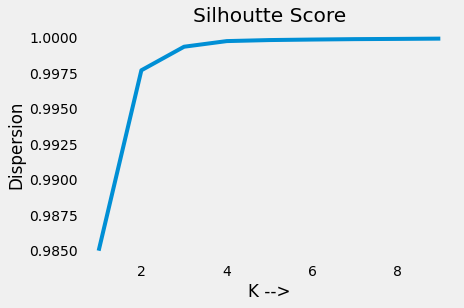

In [ ]:

costs = []
for p in range(10):
    kmeans = K_Means(k=p,data = sample,centeriod_init='random')
    centroids, cluster_assignments, iters, orig_centroids = kmeans.fit(sample)
    X = sample
    dist_ji = 0
    a = 0
    s=0
    for i in range(len(sample)):
        for j in range(p):
            dist_ji += euclidean_dist(centroids[j,:],X[i,:])
            #print(dist_ji)
    dist_ji -= sum(cluster_assignments[:,1])/len(sample)
    a = sum(cluster_assignments[:,1])/(len(sample)-1)
    s = (dist_ji - a)/max(dist_ji,a)
    s = np.array(s)
    s =  s.item()
    costs.append(s)
    print("The silhoute coeffecient for cluster number",p, "is", costs)
x = np.arange(10)
print(costs)
plt.plot(x,costs)
plt.title("Silhoutte Score")
plt.xlabel("K -->")
plt.ylabel("Dispersion")
#print(s)

# Gaussian Mixture Models Clustering

Gaussian mixture model is an unsupervised machine learning method. It summarizes a multivariate probability density function with a mixture of Gaussian probability distributions as its name suggests. It can be used for data clustering and data mining. In this lab, GMM is used for clustering.

**Step 1:  Data generation**

a) Follow the same steps as in K-means Clustering to generate the data

Dataset shape: (400, 2)


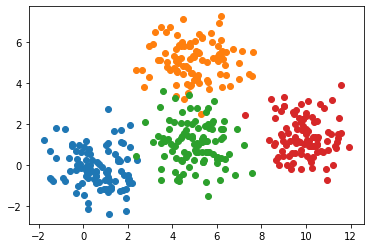

In [ ]:
import matplotlib.pyplot as plt
from sklearn import cluster, datasets, mixture
import numpy as np
from scipy.stats import multivariate_normal
from sklearn.datasets import make_spd_matrix
plt.rcParams["axes.grid"] = False

# define the number of samples to be drawn
n_samples = 100
# define the mean points for each of the systhetic cluster centers
t_means = [[0.5, 0], [5, 5], [5,1], [10, 1.5]]

# for each cluster center, create a Positive semidefinite convariance matrix
t_covs = []
for s in range(len(t_means)):
  t_covs.append(np.array([[1,0],[0,1]]))
#variance =np.array([[1,0],[0,1]])
X = []
for mean, cov in zip(t_means,t_covs):
  x = np.random.multivariate_normal(mean, cov, n_samples)
  X += list(x)
  plt.scatter(x[:,0],x[:,1],cmap='rainbow')
X = np.array(X)
np.random.shuffle(X)
print("Dataset shape:", X.shape)  
#print(len(X))

**Step 2. Initialization**

a) Mean vector (randomly any from the given data points) ($\mu_{k}$)

b) Coveriance (initialize with (identity matrix)*max(data))  ($\Sigma_{k}$)

c) Weights (uniformly) ($w_{k}$), 
with constraint: $\sum_{k=1}^{K}w_{k}=1$

In [ ]:
def initialization(data,k):
  k=k # define the number of clusters to be learned
  # write your code here
  weights = np.ones((k)) / k
  means = np.random.choice(data.flatten(), (k,data.shape[1]))
  print(means)
  print(weights)  
  # create and initialize a Positive semidefinite convariance matrix 
  cov = []
  for i in range(k):
    cov.append(make_spd_matrix(data.shape[1]))
  cov = np.array(cov)
  print(cov.shape)  
  return means, cov,weights
mean, cov,weights = initialization(X,4)
#print(mean[0])

[[  6.55   6.35]
 [  7.17 -12.03]
 [  5.48   6.06]
 [  9.77  -8.76]]
[0.25 0.25 0.25 0.25]
(4, 2, 2)


**Step 3: Expectation stage**

$$\gamma_{ik}=\frac{w_{k}P(x_{i}|\Phi_{k})}{\sum_{k=1}^{K}w_{k}P(x_{i}|\Phi_{k})}$$

where,
$$\Phi_{k}=\{\mu_{k},\Sigma_{k}\}$$
$$\theta_{k}=\{\Phi_{k},w_{k}\}$$
$$w_{k}=\frac{N_{k}}{N}$$
$$N_{k}=\sum_{i=1}^{N}\gamma_{ik}$$
$$P(x_{i}|\Phi_{k})=\frac{1}{(2 \pi)^{d/2}|\Sigma_{k}|^{1/2}}e^{-(x_{i}-\mu_{k})^{T}\Sigma_{k}^{-1}(x_{i}-\mu_{k})}$$

In [ ]:
# E-Step GMM
from scipy.stats import multivariate_normal

def E_Step_GMM(data,K,means,covariance):
    k=K
    
    # write your code here
    likelihood = []
    # Expectation step
    for j in range(k):
      likelihood.append(multivariate_normal.pdf(x=data, mean=means[j], cov=covariance[j]))
    likelihood = np.array(likelihood)
    assert likelihood.shape == (k, len(data))
    responsibility=likelihood

    return responsibility

**Step 4: Maximization stage**

a) $w_{k}=\frac{N_{k}}{N}$, where  $N_{k}=\sum_{i=1}^{N}\gamma_{ik}$

b) $\mu_{k}=\frac{\sum_{i=1}^{N}\gamma_{ik}x_{i}}{N_{k}}$

c) $\Sigma_{k}=\frac{\sum_{i=1}^{N}\gamma_{ik}(x_{i}-\mu_{k})(x_{i}-\mu_{k})^{T}}{N_{k}}$

Objective function(maximized through iteration):
$$L(\theta)=\sum_{i=1}^{N}log\sum_{k=1}^{K}w_{k}P(x_{i}|\Phi_{k})$$ 

In [ ]:
# M-STEP GMM

def M_Step_GMM(data,k,weights,responsibility):
    k=k
    # write your code here
    b = []
  # Maximization step 
    for j in range(k):
      # use the current values for the parameters to evaluate the posterior
      # probabilities of the data to have been generanted by each gaussian
      b.append((responsibility[j] * weights[j]) / (np.sum([responsibility[i] * weights[i] for i in range(k)], axis=0)+eps))
      # updage mean and variance
      means[j] = np.sum(b[j].reshape(len(X),1) * X, axis=0) / (np.sum(b[j]+eps))
      cov[j] = np.dot((b[j].reshape(len(X),1) * (X - means[j])).T, (X - means[j])) / (np.sum(b[j])+eps)
      plt.scatter(X[:,0],X[:,1])
      # update the weights
      weights[j] = np.mean(b[j])

      assert cov.shape == (k, X.shape[1], X.shape[1])
      assert means.shape == (k, X.shape[1])
      log_likelihood =b
      return means,cov, log_likelihood

**Step 5: Final run (EM algorithm)**

a) Initialization

b)Iterate E-M untill $L(\theta_{n})-L(\theta_{n-1}) \leq th$ 

c) Plot and see the cluster allocation at each iteration

[[1.5 0.5 1.4 2. ]
 [4.9 1.4 1.4 1.3]
 [5.9 0.2 1.6 0.1]
 [1.3 3.3 4.4 5.1]]
[0.25 0.25 0.25 0.25]
(4, 4, 4)


<Figure size 432x288 with 0 Axes>

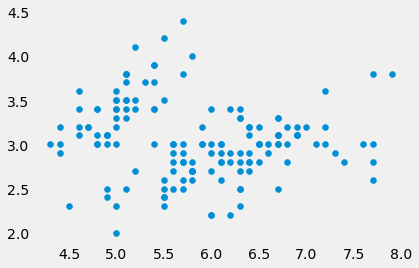

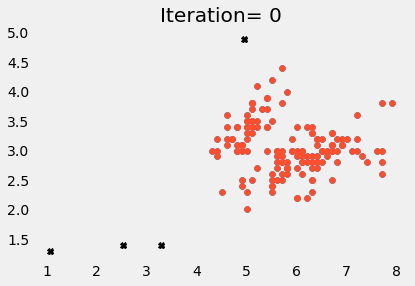

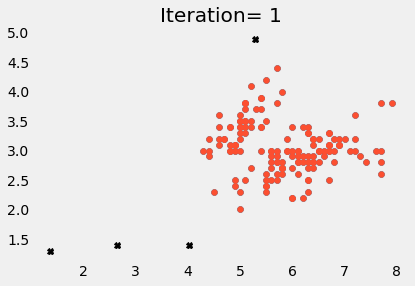

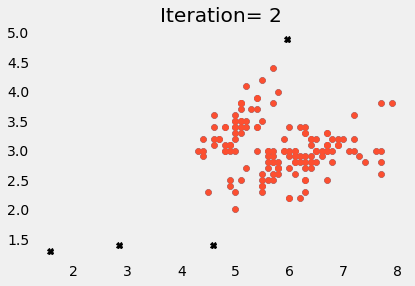

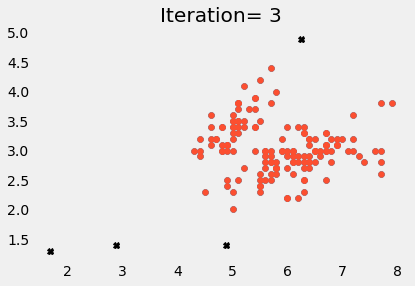

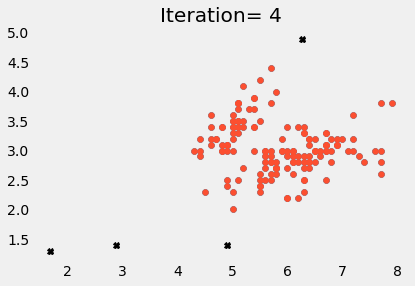

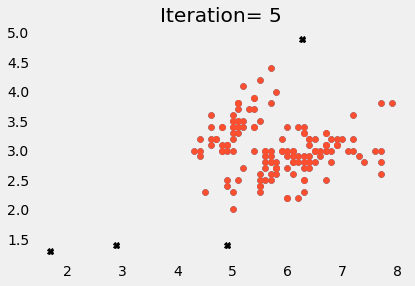

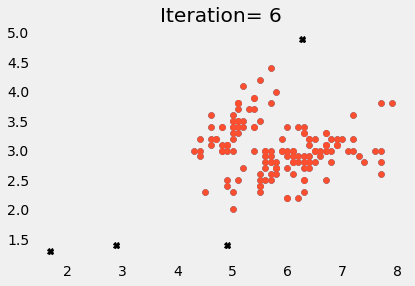

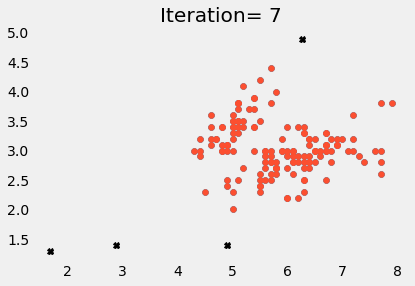

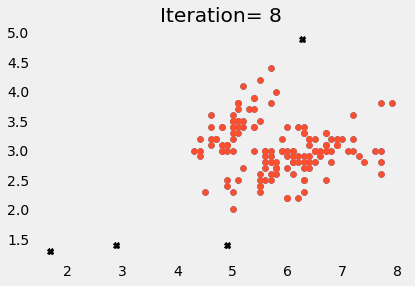

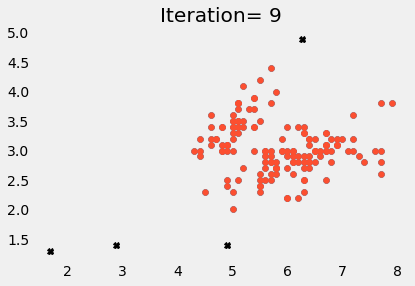

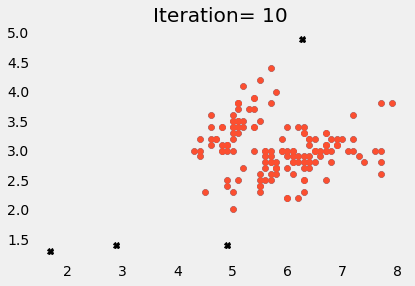

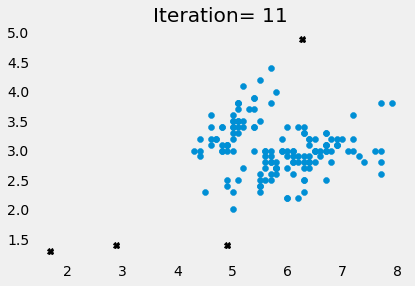

<Figure size 432x288 with 0 Axes>

In [ ]:
log_l=[]
Itr=50
eps=10**(-14)  # for threshold
clr=['r','g','b','y','k','m','c']
mrk=['+','*','X','o','.','<','p']


K = 4   # no. of clusters

means, cov, weights =initialization(X,K)
# Create a grid for visualization purposes 
x = np.linspace(np.min(X[...,0])-1,np.max(X[...,0])+1,80)
y = np.linspace(np.min(X[...,1])-1,np.max(X[...,1])+1,80)
X_,Y_ = np.meshgrid(x,y)
pos = np.array([X_.flatten(),Y_.flatten()]).T
#print(pos.shape)
#print(np.max(pos[...,1]))
#log_l=[]
for n in range(Itr):
  K=4
  responsibility=E_Step_GMM(X,K,means,cov)

  cluster_label=np.argmax(responsibility,axis=1) #Label Points

  means,cov,log_likhd=M_Step_GMM(X,K,weights,responsibility)
  log_l.append(log_likhd)
  #print(log_l[0])

  plt.figure() 
  for l in range(K): 
    id=np.where(cluster_label==l) 
    
    plt.plot(X[id,0],X[id,1],'.',color=clr[l],marker=mrk[l]) 
  Cents=means.T 
  plt.plot(Cents[:,0],Cents[:,1],'X',color='k') 
  plt.title('Iteration= %d' % (n))
  plt.scatter(X[:,0],X[:,1])
  if n>2:
    diff = (np.asarray(log_l[n])- np.asarray(log_l[n-1]))
    if np.mean(diff)<eps:
      break

plt.figure()
  
#plt.plot(range(1,n+1),log_l)

**Step 6 : Performance metric**

Compute Homogeneity score and Silhouette coefficient using the information given below 

Homogeneity score : A clustering result satisfies homogeneity if all of its clusters contain only data points which are members of a single class.
This metric is independent of the absolute values of the labels: a permutation of the class or cluster label values won’t change the score value in any way.

Silhouette coeeficient : 

$a(x)$ : Average distance of x to all other vectors in same cluster

$b(x)$ : Average distance of x to the vectors in other clusters. Find minimum among the clusters

$s(x)$ = $\frac{b(x) - a(x)}{max(a(x),b(x))}$

Silhouette coefficient (SC) : 

$$ SC =  \frac{1}{N}\sum_{i=1}^{N}s(x) $$

In [ ]:
# write your code here

Dataset shape: (400, 2)


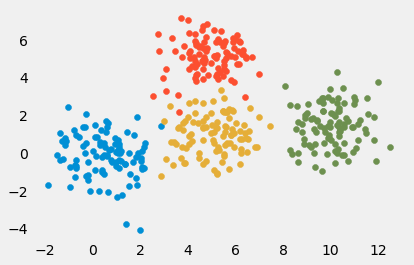

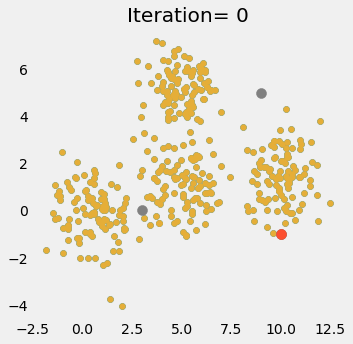

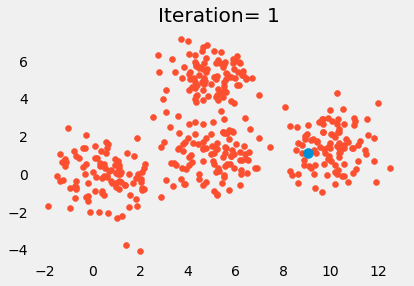

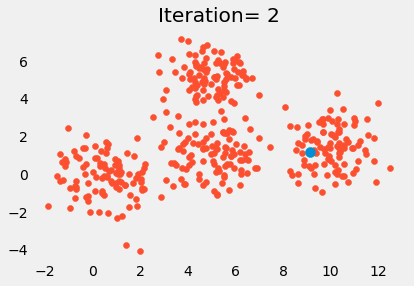

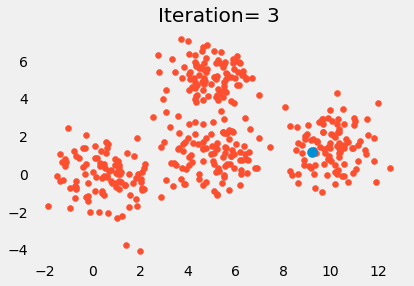

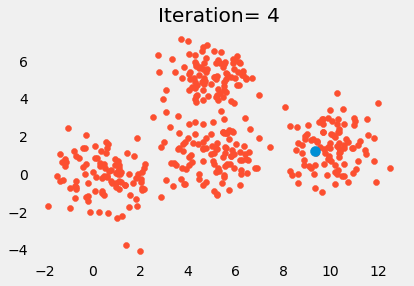

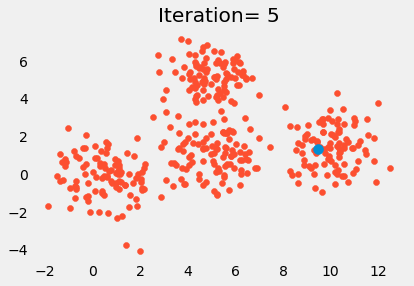

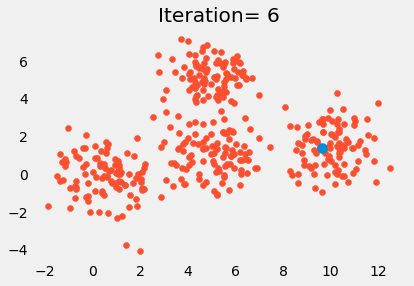

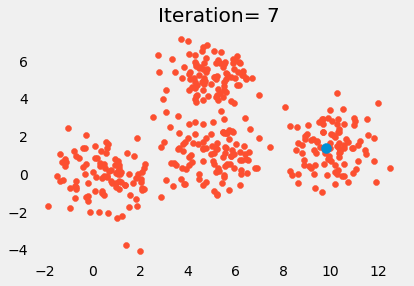

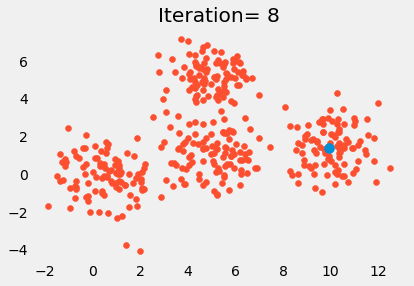

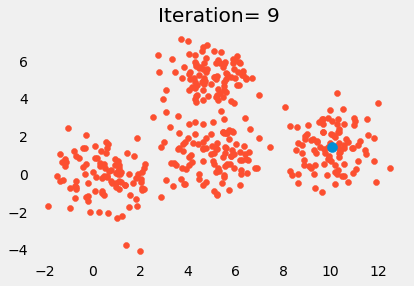

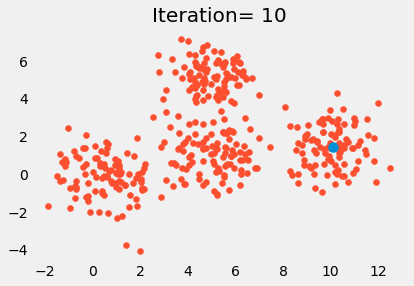

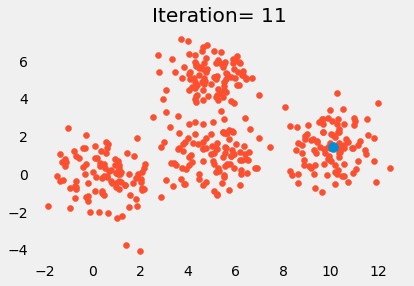

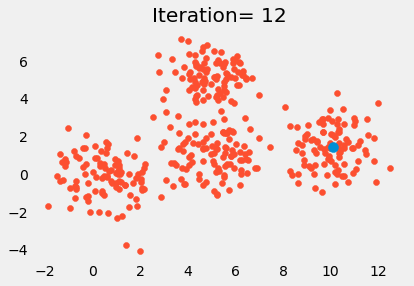

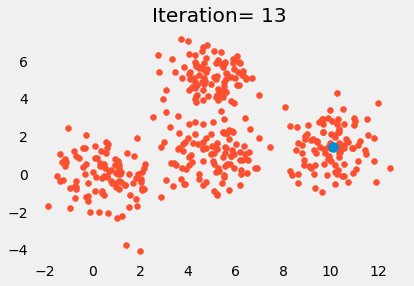

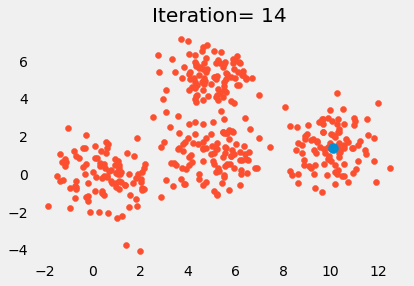

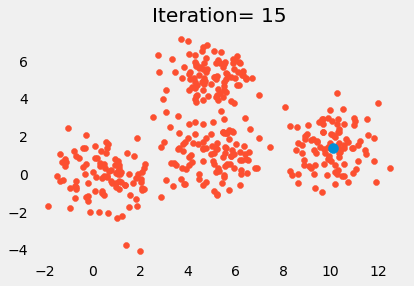

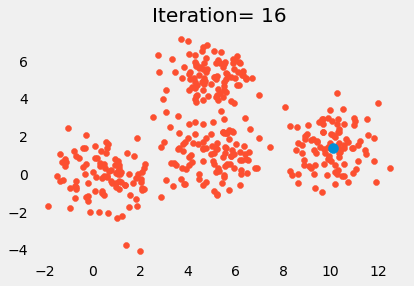

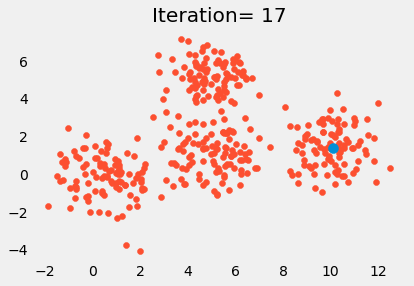

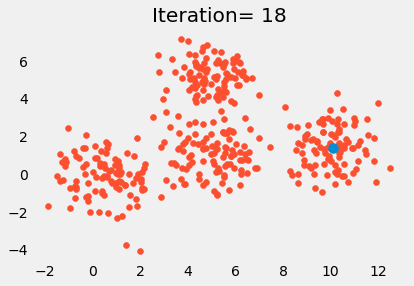

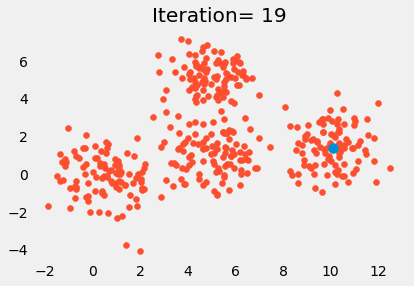

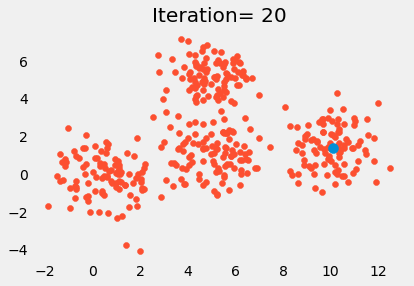

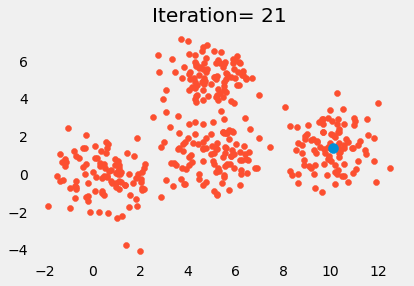

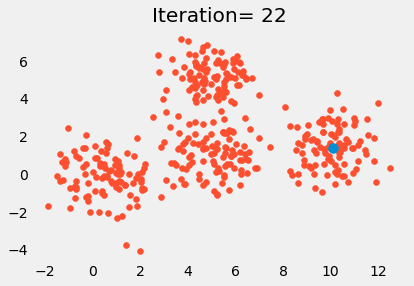

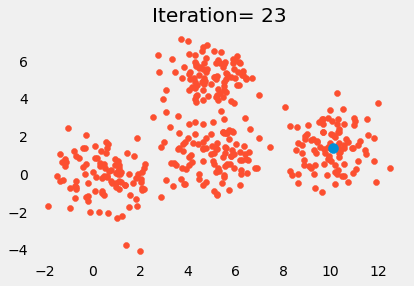

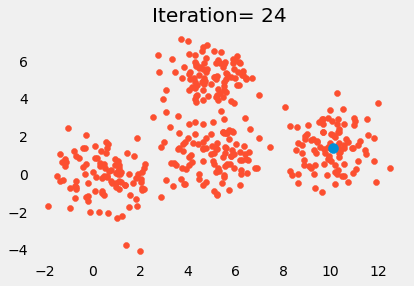

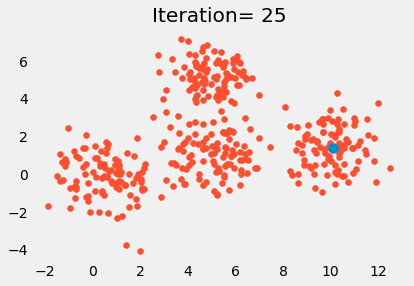

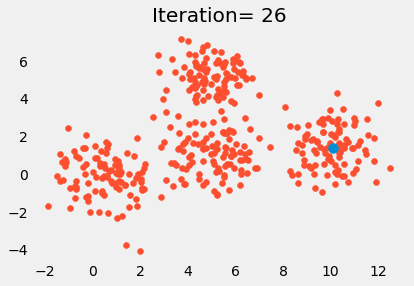

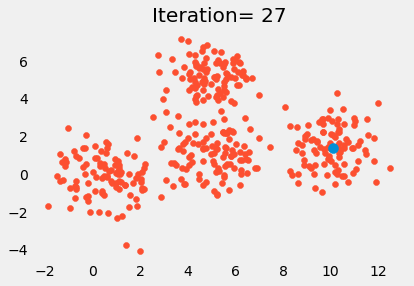

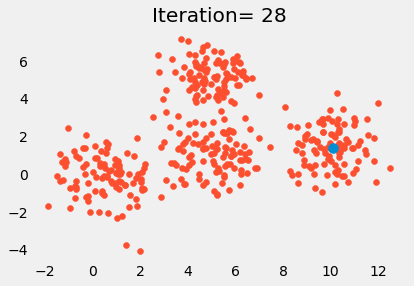

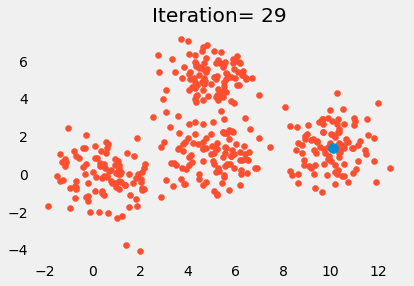

[0.9999999999997886,
 6.22250696347018e-26,
 2.1136316551593462e-13,
 6.141872462147362e-26]

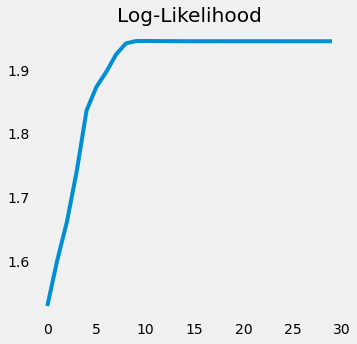

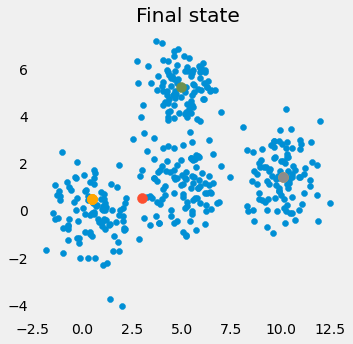

In [ ]:
import matplotlib.pyplot as plt
from matplotlib import style
style.use('fivethirtyeight')
from sklearn.datasets.samples_generator import make_blobs
import numpy as np
from scipy.stats import multivariate_normal


# 0. Create dataset
#X,Y = make_blobs(cluster_std=1.5,random_state=20,n_samples=500,centers=3)
import matplotlib.pyplot as plt
from sklearn import cluster, datasets, mixture
import numpy as np
from scipy.stats import multivariate_normal
from sklearn.datasets import make_spd_matrix
plt.rcParams["axes.grid"] = False

# define the number of samples to be drawn
n_samples = 100
# define the mean points for each of the systhetic cluster centers
t_means = [[0.5, 0], [5, 5], [5,1], [10, 1.5]]

# for each cluster center, create a Positive semidefinite convariance matrix
t_covs = []
for s in range(len(t_means)):
  t_covs.append(np.array([[1,0],[0,1]]))
#variance =np.array([[1,0],[0,1]])
X = []
for mean, cov in zip(t_means,t_covs):
  x = np.random.multivariate_normal(mean, cov, n_samples)
  X += list(x)
  plt.scatter(x[:,0],x[:,1],cmap='rainbow')
X = np.array(X)
np.random.shuffle(X)
print("Dataset shape:", X.shape)  
#print(len(X))
# Stratch dataset to get ellipsoid data
X = X


class GMM:

    def __init__(self,X,number_of_sources,iterations):
        self.iterations = iterations
        self.number_of_sources = number_of_sources
        self.X = X
        self.mu = None
        self.pi = None
        self.cov = None
        self.XY = None
        
    

    """Define a function which runs for iterations, iterations"""
    def run(self):
        self.reg_cov = 1e-6*np.identity(len(self.X[0]))
        x,y = np.meshgrid(np.sort(self.X[:,0]),np.sort(self.X[:,1]))
        self.XY = np.array([x.flatten(),y.flatten()]).T
           
                    
        """ 1. Set the initial mu, covariance and pi values"""
        self.mu = np.random.randint(min(self.X[:,0]),max(self.X[:,0]),size=(self.number_of_sources,len(self.X[0]))) # This is a nxm matrix since we assume n sources (n Gaussians) where each has m dimensions
        self.cov = np.zeros((self.number_of_sources,len(X[0]),len(X[0]))) # We need a nxmxm covariance matrix for each source since we have m features --> We create symmetric covariance matrices with ones on the digonal
        for dim in range(len(self.cov)):
            np.fill_diagonal(self.cov[dim],5)


        self.pi = np.ones(self.number_of_sources)/self.number_of_sources # Are "Fractions"
        log_likelihoods = [] # In this list we store the log likehoods per iteration and plot them in the end to check if
                             # if we have converged
            
        """Plot the initial state"""    
        fig = plt.figure(figsize=(5,5))
        ax0 = fig.add_subplot(111)
        ax0.scatter(self.X[:,0],self.X[:,1], cmap ='rainbow')
        ax0.set_title('Initial state')
        for m,c in zip(self.mu,self.cov):
            c += self.reg_cov
            multi_normal = multivariate_normal(mean=m,cov=c)
            #ax0.contour(np.sort(self.X[:,0]),np.sort(self.X[:,1]),multi_normal.pdf(self.XY).reshape(len(self.X),len(self.X)),colors='black',alpha=0.3)
            ax0.scatter(m[0],m[1],c='grey',zorder=10,s=100)
        
        for i in range(self.iterations):               
            
            """E Step"""
            r_ic = np.zeros((len(self.X),len(self.cov)))

            for m,co,p,r in zip(self.mu,self.cov,self.pi,range(len(r_ic[0]))):
                co+=self.reg_cov
                mn = multivariate_normal(mean=m,cov=co)
                r_ic[:,r] = p*mn.pdf(self.X)/np.sum([pi_c*multivariate_normal(mean=mu_c,cov=cov_c).pdf(X) 
                for pi_c,mu_c,cov_c in zip(self.pi,self.mu,self.cov+self.reg_cov)],axis=0)      
          

            # Calculate the new mean vector and new covariance matrices, based on the probable membership of the single x_i to classes c --> r_ic
            self.mu = []
            self.cov = []
            self.pi = []
            log_likelihood = []

            for c in range(len(r_ic[0])):
                m_c = np.sum(r_ic[:,c],axis=0)
                mu_c = (1/m_c)*np.sum(self.X*r_ic[:,c].reshape(len(self.X),1),axis=0)
                self.mu.append(mu_c)

                # Calculate the covariance matrix per source based on the new mean
                self.cov.append(((1/m_c)*np.dot((np.array(r_ic[:,c]).reshape(len(self.X),1)*(self.X-mu_c)).T,(self.X-mu_c)))+self.reg_cov)
                # Calculate pi_new which is the "fraction of points" respectively the fraction of the probability assigned to each source 
                self.pi.append(m_c/np.sum(r_ic))           
            
            """Log likelihood"""
            log_likelihoods.append(np.log(np.sum([k*multivariate_normal(self.mu[i],self.cov[j]).pdf(X) for k,i,j in zip(self.pi,range(len(self.mu)),range(len(self.cov)))])))
            plt.title('Iteration= %d' % (i)) 
            #ax2.contour(np.sort(self.X[:,0]),np.sort(self.X[:,1]),multi_normal.pdf(self.XY).reshape(len(self.X),len(self.X)),colors='black',alpha=0.3)
            plt.scatter(m[0],m[1],cmap='rainbow',zorder=10,s=100)
            plt.scatter(self.X[:,0],self.X[:,1], cmap ='rainbow')
            plt.show()
            
            #ax0.scatter(self.mu[i][0],self.mu[i][1],cmap='rainbow',zorder=10,s=100) 
            
        fig2 = plt.figure(figsize=(5,5))
        ax1 = fig2.add_subplot(111) 
        ax1.set_title('Log-Likelihood')
        ax1.plot(range(0,self.iterations,1),log_likelihoods)
        #plt.show()
    
    """Predict the membership of an unseen, new datapoint"""
    def predict(self,Y):
        # PLot the point onto the fittet gaussians
        fig3 = plt.figure(figsize=(5,5))
        ax2 = fig3.add_subplot(111)
        ax2.scatter(self.X[:,0],self.X[:,1])
        for m,c in zip(self.mu,self.cov):
            multi_normal = multivariate_normal(mean=m,cov=c)
            #ax2.contour(np.sort(self.X[:,0]),np.sort(self.X[:,1]),multi_normal.pdf(self.XY).reshape(len(self.X),len(self.X)),colors='black',alpha=0.3)
            ax2.scatter(m[0],m[1],cmap='rainbow',zorder=10,s=100)
            ax2.set_title('Final state')
            for y in Y:
                ax2.scatter(y[0],y[1],c='orange',zorder=10,s=100)
        prediction = []        
        for m,c in zip(self.mu,self.cov):  
            #print(c)
            prediction.append(multivariate_normal(mean=m,cov=c).pdf(Y)/np.sum([multivariate_normal(mean=mean,cov=cov).pdf(Y) for mean,cov in zip(self.mu,self.cov)]))
        #plt.show()
        return prediction
         
    
    
GMM = GMM(X,4,30)     
GMM.run()
GMM.predict([[0.5,0.5]])


 

# GMM v/s K-means

(a) Generate Data to show shortcomings of Kmeans and advantage of GMM over it

(b) Perform GMM on the same data and justify how it is better than K-means in that particular case

(c) Verify the same using performance metrics

In [ ]:
# write your code here

#code available at last _implemented on iris dataset

# Practical Use Case : K-means Clustering

For this exercise we will be using the **IRIS FLOWER DATASET** and explore how K-means clustering is performing

**IRIS Dataset** consists of 50 samples from each of the three species of Iris flower (Iris Setosa, Iris Viriginca and Iris Versicolor)

Four features were measured from each sample : Length of Sepals, Width of sepals, Length of Petals, Width of Sepals all in centimeters. Based on the combinations of these 4 features each flower was categorized into one of the 3 species




**Steps :** 

(a) Convert the given iris.csv file into a Pandas Dataframe, then extract both feature vector and target vector

(b) Perform analysis of Dataset, Plot the following features : (Sepal Length vs Sepal Width), (Petal Length vs Petal Width)


(c) Next group the data points into 3 clusters using the above K-means Clustering algorithm and compare the performance against the true labels obtained by the target vector, Also explain the results using a Confusion matrix

(d) Next use scikit learn tool to perform K-means Clustering and compare the performance against the true labels obtained by the target vector, Also explain the results using a Confusion matrix

(e) Vary the Number of Clusters (K) and run K-means algorithm from 1-10 and find the optimal number of clusters

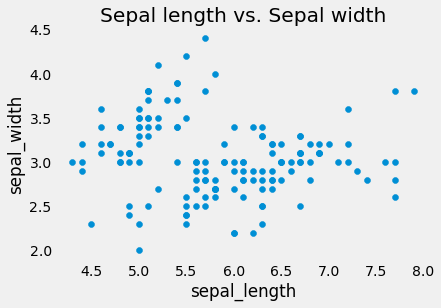

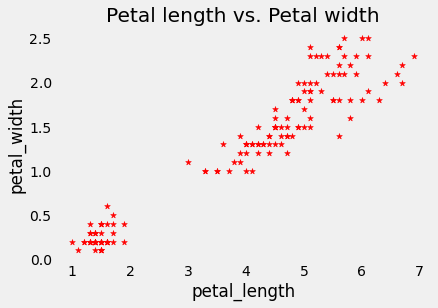

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: Species, Length: 150, dtype: object


In [ ]:
## write your code here
import pandas as pd
data = pd.read_csv(r"/content/Iris.csv")
#print(data)
X = data.iloc[:,:-1]
Y = data.iloc[:,-1]
#print(X[["SepalWidthCm"]])
x= X[["SepalLengthCm"]] #SepalLengthCm
y =X[["SepalWidthCm"]] #SepalWidthCm
x1 = X[["PetalLengthCm"]] #PetalLengthCm
y1= X[["PetalWidthCm"]] #PetalWidthCm
#print(x)
plt.title("Sepal length vs. Sepal width")
plt.xlabel("sepal_length")
plt.ylabel("sepal_width")
plt.scatter(x,y)
plt.show()
plt.title("Petal length vs. Petal width")
plt.xlabel("petal_length")
plt.ylabel("petal_width")
plt.scatter(x1,y1,c="red",marker="*")
plt.show()
X.index.name= None
X =(X.iloc[:,1:])
X = X.values
#print(X)
print(Y)


100


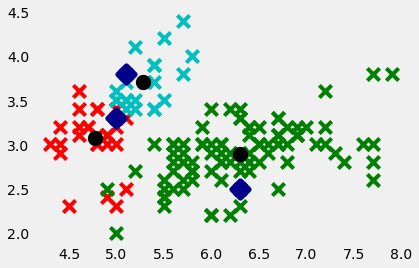

In [ ]:
# k_means algorithm on iris dataset
def plot(data,k,index,centroids,orig_centroids):
    input = []
    for i in range(len(index)):
        for j in index[i]:
          input.append(int(j))
          #print(np.unique(input))
            
    colors = 10*["g","r","c"]
    j=0
    for i in input:
        plt.scatter(data[:,0][j], data[:,1][j], marker="x", color=colors[i], s=150, linewidths=3)
        j+=1
    ## New centroids
    for centroid in range(len(centroids)):
        plt.scatter(centroids[centroid][0],centroids[centroid][1],marker="o", color="k", s=150, linewidths=3)
    # Original Clusters
    for centroid in range(len(orig_centroids)):
        plt.scatter(orig_centroids[centroid][0],orig_centroids[centroid][1],marker="D", color="DarkBlue", s=150, linewidths=5)
kmeans = K_Means(k=3,data = X,centeriod_init='random')
centroids, cluster_assignments, iters, orig_centroids = kmeans.fit(X)
index = cluster_assignments[:,0] ## This has the cluster assignment 0,1,.... 
distance = cluster_assignments[:,1]  ## This has the distance from their respective centroides for evaluation purposes 
k=3
print(iters)
clusters = np.asarray(cluster_assignments)
#print((clusters))
plot(X,k,index,centroids,orig_centroids)
#plt.scatter(clusters[:,0],clusters[:,1],marker ='o')


Silhouetter Score: 0.553


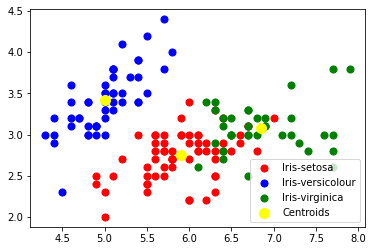

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
# Instantiate the KMeans models
#
km = KMeans(n_clusters=3, random_state=42)
#
# Fit the KMeans model
#
clusters = km.fit_predict(X)
#
# Calculate Silhoutte Score
#
score = silhouette_score(X, km.labels_, metric='euclidean')
#
# Print the score
#
print('Silhouetter Score: %.3f' % score)
data_with_cluster=data.copy()
data_with_cluster['clusters'] = clusters
#print(data_with_cluster)
#plt.scatter(data_with_cluster['Species'],data_with_cluster['clusters'],c=data_with_cluster['clusters'],cmap='rainbow')
#np.unique(clusters)
#plt.show()
y_kmeans=clusters
#Visualising the clusters
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 50, c = 'red', label = 'Iris-setosa')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 50, c = 'blue', label = 'Iris-versicolour')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 50, c = 'green', label = 'Iris-virginica')

#Plotting the centroids of the clusters
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:,1], s = 100, c = 'yellow', label = 'Centroids')
plt.legend()
plt.show()

In [ ]:
from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix
# Split the data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=0)

# Run classifier, using a model that is too regularized (C too low) to see
# the impact on the results
classifier = svm.SVC(kernel='linear', C=0.01).fit(X_train, y_train)
class_names = ["Iris-setosa",'Iris-versicolour','Iris-virginica']
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    #disp = plot_confusion_matrix(classifier, X_test, y_test,
                                 #display_labels=class_names,
                                 #cmap=plt.cm.Blues,
                                 #normalize=normalize)
    #disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

#plt.show()

Confusion matrix, without normalization
[[1.   0.   0.  ]
 [0.   0.62 0.38]
 [0.   0.   1.  ]]
Normalized confusion matrix
[[1.   0.   0.  ]
 [0.   0.62 0.38]
 [0.   0.   1.  ]]


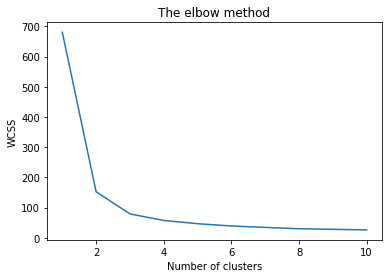

In [ ]:
#Finding the optimum number of clusters for k-means classification
from sklearn.cluster import KMeans
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') #within cluster sum of squares
plt.show()

# Practical Use Case : GMM

**Steps :** 

(a) Convert the given iris.csv file into a Pandas Dataframe, then extract both feature vector and target vector

(b) Next group the data points into 3 clusters using the above GMM Clustering algorithm and compare the performance against the true labels obtained by the target vector, Also explain the results using a Confusion matrix

(c) Next use scikit learn tool to perform GMM Clustering and compare the performance against the true labels obtained by the target vector, Also explain the results using a Confusion matrix

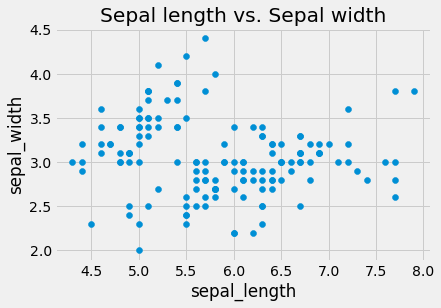

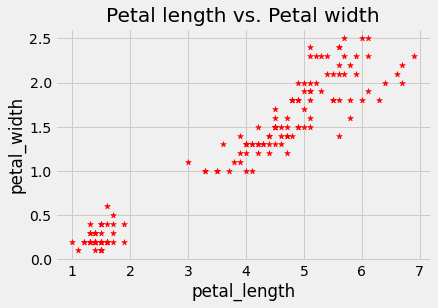

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: Species, Length: 150, dtype: object


In [ ]:
# write your code here
## write your code here
import pandas as pd
data = pd.read_csv(r"/content/Iris.csv")
#print(data)
X = data.iloc[:,:-1]
Y = data.iloc[:,-1]
#print(X[["SepalWidthCm"]])
x= X[["SepalLengthCm"]] #SepalLengthCm
y =X[["SepalWidthCm"]] #SepalWidthCm
x1 = X[["PetalLengthCm"]] #PetalLengthCm
y1= X[["PetalWidthCm"]] #PetalWidthCm
#print(x)
plt.title("Sepal length vs. Sepal width")
plt.xlabel("sepal_length")
plt.ylabel("sepal_width")
plt.scatter(x,y)
plt.show()
plt.title("Petal length vs. Petal width")
plt.xlabel("petal_length")
plt.ylabel("petal_width")
plt.scatter(x1,y1,c="red",marker="*")
plt.show()
X.index.name= None
X =(X.iloc[:,1:])
X = X.values
#print(X)
print(Y)


In [ ]:
data['Species'] = pd.factorize(data['Species'])[0].astype(np.uint16)
Y = data.iloc[:,-1]
print(Y)

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: Species, Length: 150, dtype: uint16


[2.9941312838316596e-05, 0.0, 0.9999700586871617]

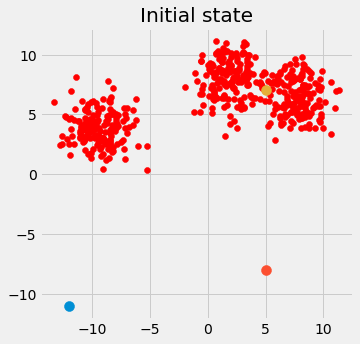

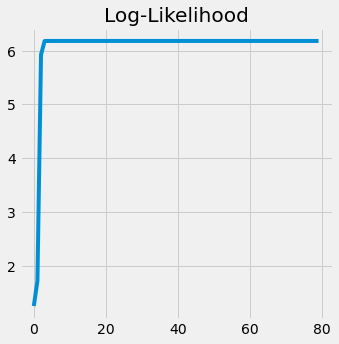

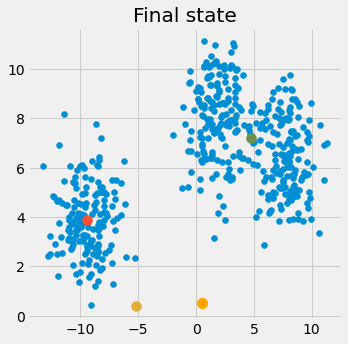

In [ ]:
import matplotlib.pyplot as plt
from matplotlib import style
style.use('fivethirtyeight')
from sklearn.datasets.samples_generator import make_blobs
import numpy as np
from scipy.stats import multivariate_normal

Y_target =Y
# 0. Create dataset
X,y = make_blobs(cluster_std=1.5,random_state=20,n_samples=500,centers=3)

# Stratch dataset to get ellipsoid data
X = X
 

class GMM:

    def __init__(self,X,number_of_sources,iterations):
        self.iterations = iterations
        self.number_of_sources = number_of_sources
        self.X = X
        self.mu = None
        self.pi = None
        self.cov = None
        self.XY = None
        
    

    """Define a function which runs for iterations, iterations"""
    def run(self):
        self.reg_cov = 1e-6*np.identity(len(self.X[0]))
        x,y = np.meshgrid(np.sort(self.X[:,0]),np.sort(self.X[:,1]))
        self.XY = np.array([x.flatten(),y.flatten()]).T
           
                    
        """ 1. Set the initial mu, covariance and pi values"""
        self.mu = np.random.randint(min(self.X[:,0]),max(self.X[:,0]),size=(self.number_of_sources,len(self.X[0]))) # This is a nxm matrix since we assume n sources (n Gaussians) where each has m dimensions
        self.cov = np.zeros((self.number_of_sources,len(X[0]),len(X[0]))) # We need a nxmxm covariance matrix for each source since we have m features --> We create symmetric covariance matrices with ones on the digonal
        for dim in range(len(self.cov)):
            np.fill_diagonal(self.cov[dim],5)


        self.pi = np.ones(self.number_of_sources)/self.number_of_sources # Are "Fractions"
        log_likelihoods = [] # In this list we store the log likehoods per iteration and plot them in the end to check if
                             # if we have converged
            
        """Plot the initial state"""    
        fig = plt.figure(figsize=(5,5))
        ax0 = fig.add_subplot(111)
        ax0.scatter(self.X[:,0],self.X[:,1], c= 'red')
        ax0.set_title('Initial state')
        for m,c in zip(self.mu,self.cov):
            c += self.reg_cov
            multi_normal = multivariate_normal(mean=m,cov=c)
            #ax0.contour(np.sort(self.X[:,0]),np.sort(self.X[:,1]),multi_normal.pdf(self.XY).reshape(len(self.X),len(self.X)),colors='black',alpha=0.3)
            ax0.scatter(m[0],m[1],cmap='rainbow',zorder=10,s=100)
        
        for i in range(self.iterations):               

            """E Step"""
            r_ic = np.zeros((len(self.X),len(self.cov)))

            for m,co,p,r in zip(self.mu,self.cov,self.pi,range(len(r_ic[0]))):
                co+=self.reg_cov
                mn = multivariate_normal(mean=m,cov=co)
                r_ic[:,r] = p*mn.pdf(self.X)/np.sum([pi_c*multivariate_normal(mean=mu_c,cov=cov_c).pdf(X) for pi_c,mu_c,cov_c in zip(self.pi,self.mu,self.cov+self.reg_cov)],axis=0)

          

            # Calculate the new mean vector and new covariance matrices, based on the probable membership of the single x_i to classes c --> r_ic
            self.mu = []
            self.cov = []
            self.pi = []
            log_likelihood = []

            for c in range(len(r_ic[0])):
                m_c = np.sum(r_ic[:,c],axis=0)
                mu_c = (1/m_c)*np.sum(self.X*r_ic[:,c].reshape(len(self.X),1),axis=0)
                self.mu.append(mu_c)

                # Calculate the covariance matrix per source based on the new mean
                self.cov.append(((1/m_c)*np.dot((np.array(r_ic[:,c]).reshape(len(self.X),1)*(self.X-mu_c)).T,(self.X-mu_c)))+self.reg_cov)
                # Calculate pi_new which is the "fraction of points" respectively the fraction of the probability assigned to each source 
                self.pi.append(m_c/np.sum(r_ic))           
            
            """Log likelihood"""
            log_likelihoods.append(np.log(np.sum([k*multivariate_normal(self.mu[i],self.cov[j]).pdf(X) for k,i,j in zip(self.pi,range(len(self.mu)),range(len(self.cov)))])))

        fig2 = plt.figure(figsize=(5,5))
        ax1 = fig2.add_subplot(111) 
        ax1.set_title('Log-Likelihood')
        ax1.plot(range(0,self.iterations,1),log_likelihoods)
        #plt.show()
    
    """Predict the membership of an unseen, new datapoint"""
    def predict(self,Y):
        # PLot the point onto the fittet gaussians
        fig3 = plt.figure(figsize=(5,5))
        ax2 = fig3.add_subplot(111)
        ax2.scatter(self.X[:,0],self.X[:,1])
        for m,c in zip(self.mu,self.cov):
            multi_normal = multivariate_normal(mean=m,cov=c)
            #ax2.contour(np.sort(self.X[:,0]),np.sort(self.X[:,1]),multi_normal.pdf(self.XY).reshape(len(self.X),len(self.X)),colors='black',alpha=0.3)
            ax2.scatter(m[0],m[1],cmap='rainbow',zorder=10,s=100)
            ax2.set_title('Final state')
            for y in Y:
                ax2.scatter(y[0],y[1],c='orange',zorder=10,s=100)
        prediction = []        
        for m,c in zip(self.mu,self.cov):  
            #print(c)
            prediction.append(multivariate_normal(mean=m,cov=c).pdf(Y)/np.sum([multivariate_normal(mean=mean,cov=cov).pdf(Y) for mean,cov in zip(self.mu,self.cov)]))
        #plt.show()
        return prediction
         

 
GMM=GMM(X,3,80)
GMM.run()
GMM.predict([[0.5,0.5]])

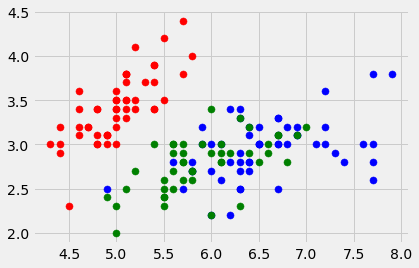

In [ ]:
# the data is unbalanced (eg sepallength ~4x petalwidth), so should do feature scaling,
# otherwise the larger features will dominate the others in clustering, etc.

from sklearn import preprocessing

scaler = preprocessing.StandardScaler()

#scaler.fit(X)
#X_scaled_array = scaler.transform(X)
#X_scaled = pd.DataFrame(X_scaled_array, columns = X.columns)

#X_scaled.sample(5)
from sklearn.mixture import GaussianMixture
X_scaled_array=X
gmm = GaussianMixture(n_components=3)
gmm.fit(X_scaled_array)

# predict the cluster for each data point
y_cluster_gmm = gmm.predict(X_scaled_array)


from sklearn import metrics
score = metrics.silhouette_score(X_scaled_array, y_cluster_gmm)
print(score)

#Visualising the clusters
plt.scatter(X[y_cluster_gmm == 0, 0], X[y_cluster_gmm == 0, 1], s = 50, c = 'red', label = 'Iris-setosa')
plt.scatter(X[y_cluster_gmm == 1, 0], X[y_cluster_gmm == 1, 1], s = 50, c = 'blue', label = 'Iris-versicolour')
plt.scatter(X[y_cluster_gmm == 2, 0], X[y_cluster_gmm == 2, 1], s = 50, c = 'green', label = 'Iris-virginica')


In [ ]:
from sklearn.metrics import adjusted_rand_score

iris_kmeans_score = adjusted_rand_score(Y.values.flatten(), 
                                        y_kmeans.flatten())
print(round(iris_kmeans_score,3))

iris_gmm_score = adjusted_rand_score(Y.values.flatten(), 
                                     y_cluster_gmm.flatten())

print(round(iris_gmm_score,3))

0.73
0.904
